# Problema 37 y 38
## 37)
Queremos integrar la ecuación de movimiento <br>
### <center> $\frac{d^2 \vec r}{dt^2} = \frac{-GM_\odot}{r^2} \hat r$ </center>
Que si lo pasamos a cartesianas queda <br>

### <center> $\vec a(\vec r,t) = (a_x,a_y) = -GM_\odot (\frac{x(t)}{r^3(t)},\frac{y(t)}{r^3(t)})$ </center>

Donde $r^2 = x^2 + y^2$ ; $G,M_\odot , d$ son ctes y <br>
<center> $\vec r_0 = (d,0)$ ; $\vec v_0 = (0,\sqrt{\frac{GM_\odot}{d}})$ </center> <br>
Son las condiciones iniciales. <br>

Hay que tener cuidado porque estamos en el sistema **M.K.S.**, y si queremos hacer una integración de $T = 100$ años, debemos convertir a segundos... <br>
Luego, pediremos distintas integraciones con $h = 10^{-i}$ años, $i \in (2,3,...,6)$. <br>
Queremos obtener el **error porcentual** en la conservación de la energía para los métodos <br>

- Euler Explícito
- LeapFrog *LF* KDK
- LF DKD
- Runge-Kutta *R-K* 2º orden
- R-K 4º orden

La energía del sistema viene dada por <br>
<center> $E(t) = \frac{1}{2}M_T \cdot V^2(t) - \frac{GM_\odot}{r(t)}$ </center> <br>

Comencemos con el método de **LeapFrog KDK:**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#ctes:

G = 6.67408e-11 # m^3 kg^-1 seg^-2
G = G/(1000**3) # km^3 kg^-1 seg^-2

M = 1.991e+30 # Masa del Sol, en kg
M_t = 5.97e+24 #Masa de la Tierra, en kg
r0 = 1.5e+8 #distancia Tierra - Sol, en km
t = 100 #tiempo de integración total, en años
t = t*3.154e+7 #segundos

#Qué necesito: acc = -grad pot ; posc inic = (r0,0) kms (Mov 2D por F central) ; vel inic = (0,v0) km/s ; 
#step = tiempo de integ * 10 ^-i (i = {4,5,6,7,8}) ; cant de steps n = t/step = 10^i ; Energía = E(t,r,v^2)

#Calculemos v0 y E0:

v0 = np.sqrt(G*M/r0) #km/s
E0 = M_t*(v0**2)/2 - G*M/r0 #Valor de la Energía en t = 0

DeltaE = np.empty(5) #Para medir los errores máximos en las 5 integraciones para h distinto que realizaremos con LF

#step y n (lo podríamos poner dentro de una func...):

n = int(1e+4)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

def a(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r**(-3)),y*(r**(-3))])
    return a

#Y escribamos el integrador, que va a ser el LF KDK porque sabemos que es re bien comportado para el caso P2C:

def LF_KDK(a,x,y,n,h,vx=0,vy=v0): #(x,y) listas vacías excepto por las pos inic, (vx,vy) variables, pero comenzamos con las v inic.
                                # a = (ax,ay) func para obtener la aceleración.
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        kx = vx + a(x[i],y[i])[0]*h/2
        ky = vy + a(x[i],y[i])[1]*h/2
        
        x[i+1] = x[i] + kx*h
        y[i+1] = y[i] + ky*h
        
        vx = kx + a(x[i+1],y[i+1])[0]*h/2
        vy = ky + a(x[i+1],y[i+1])[1]*h/2
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

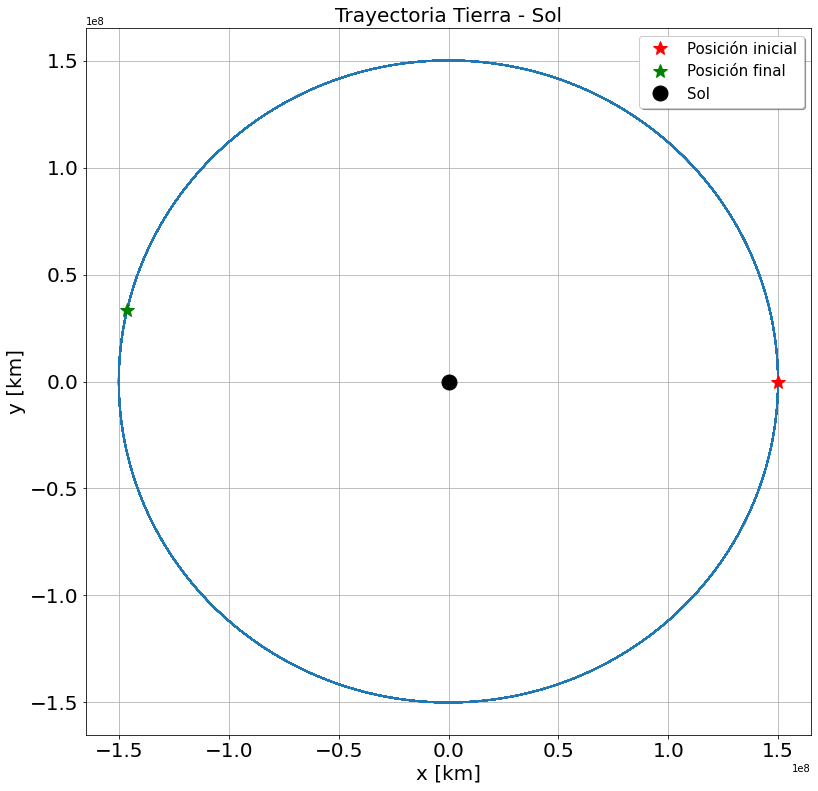

In [2]:
#Para ver no más, visualicemos la trayectoria que está recorriendo la Tierra:

P = LF_KDK(a,x,y,n,h)

plt.figure(figsize=(13,13))
plt.xlabel('x [km]',size=20)
plt.ylabel('y [km]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Trayectoria Tierra - Sol',size=20)
plt.plot(P[0],P[1])
plt.plot(x[0],y[0],'*r',markersize=15,label='Posición inicial')
plt.plot(P[0][-1],P[1][-1],'*g',markersize=15,label='Posición final')
plt.plot(0,0,'ok',markersize=15,label='Sol')
plt.legend(fontsize=15,shadow=True,loc='upper right')
plt.grid(True)

##### *Mostramos 1 vez la variación de la energía y la trayectoria sólo para entender el comportamiento*

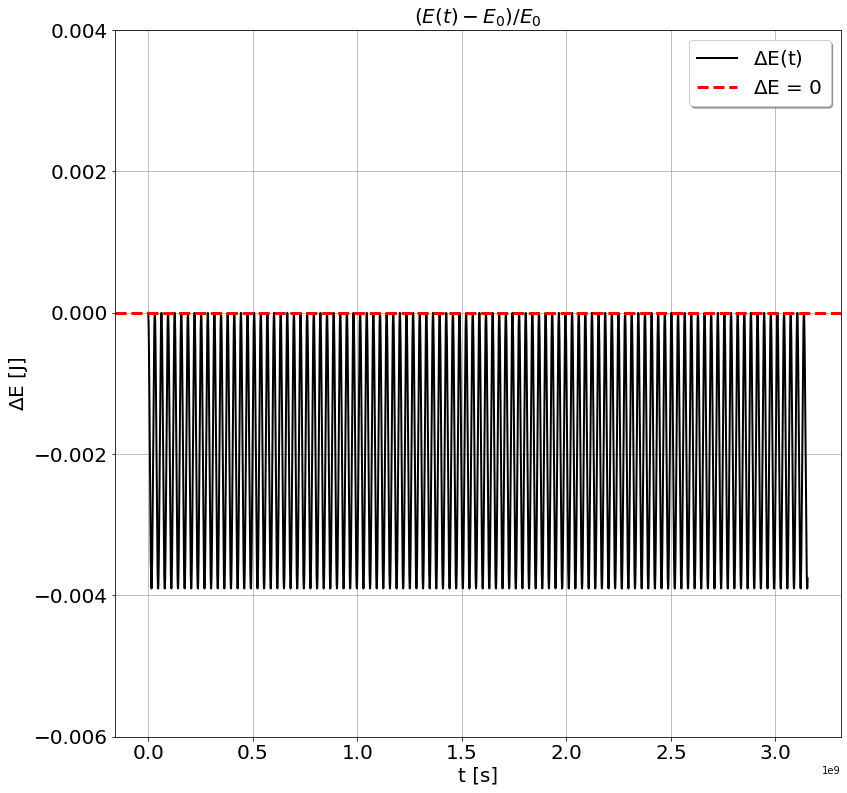

In [3]:
#Veamos el error porcentual:
DeltaE[0] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [s]',size=20)
plt.ylabel('$\Delta$E [J]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

In [4]:
n = int(1e+5)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_KDK(a,x,y,n,h)

DeltaE[1] = max(abs(dE))

In [5]:
n = int(1e+6)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_KDK(a,x,y,n,h)

DeltaE[2] = max(abs(dE))

In [6]:
n = int(1e+7)
h = t/n
n = int(1e+6) #Para reducir el tiempo de cómputo. Acá estaría dando ~ 10 vtas en vez de 100...

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_KDK(a,x,y,n,h)

DeltaE[3] = max(abs(dE))

In [7]:
n = int(1e+8)
h = t/n
n = int(1e+7)

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_KDK(a,x,y,n,h)

DeltaE[4] = max(abs(dE))

Reproduzcamos pues, la Figura 3.1 del Numerical Methods in Astrophysics: <br>
*Ojo, que esa figura está hecha para el método de Euler. Acá 1º mostraremos los resultados para LF-KDK*

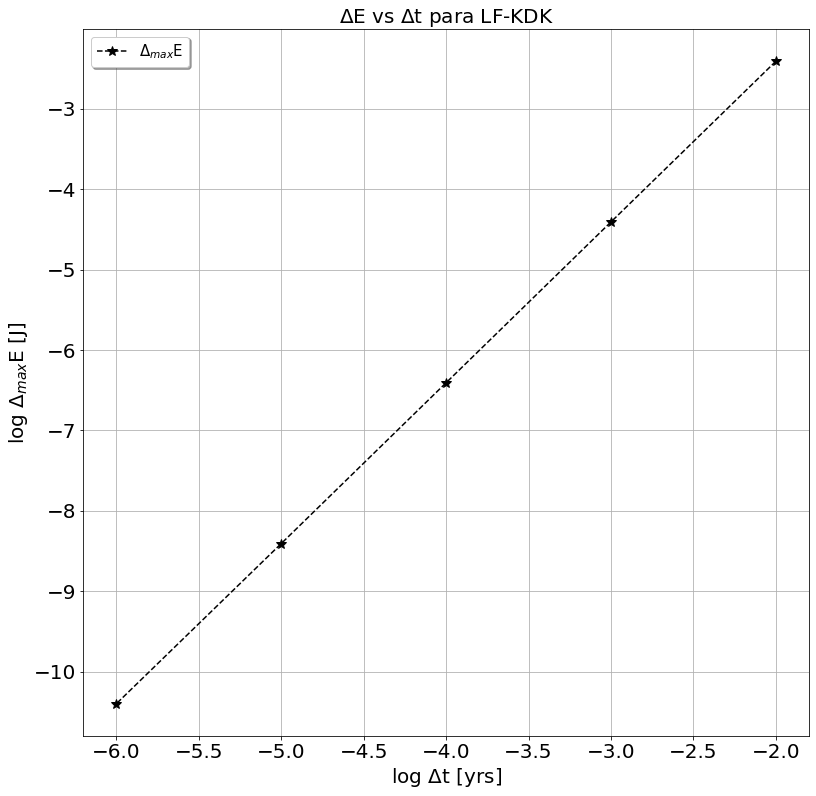

In [10]:
logE = np.log10(DeltaE) #Para poner el error en escala logarítmica

plt.figure(figsize=(13,13))
plt.xlabel('log $\Delta$t [yrs]',size=20)
plt.ylabel('log $\Delta_{max}$E [J]',size=20)
plt.title('$\Delta$E vs $\Delta$t para LF-KDK',size=20)
plt.plot([-i for i in range(2,7)],logE,'--*k',label='$\Delta_{max}$E',markersize=10)
plt.legend(loc='upper left',fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

*PD: Notamos que la oscilación en la energía es periódica para este caso. Luego, cuando repitamos el proceso para el LF-DKD, acortaremos los tiempos deintegración de 100 a 10 años en los últimos casos. No realizaremos esta cota para los métodos de R-K y Euler.*

Sigamos para **LeapFrog DKD:**

In [41]:
#Ahora sería repetir: definir los demás integradores, graficar el 1º caso de trayectoria y energía, y plotear el gráfico importante para difs h...

v0 = np.sqrt(G*M/r0) #km/s
E0 = M_t*(v0**2)/2 - G*M/r0

DeltaE = np.empty(5) #Para medir los errores máximos en las 5 integraciones para h distinto que realizaremos con LF

#step y n (lo podríamos poner dentro de una func...):

n = int(1e+4)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

def a(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r**(-3)),y*(r**(-3))])
    return a

#Y escribamos el integrador, que va a ser el LF KDK porque sabemos que es re bien comportado para el caso P2C:

def LF_DKD(a,x,y,n,h,vx=0,vy=v0): #(x,y) listas vacías excepto por las pos inic, (vx,vy) variables, pero comenzamos con las v inic.
                                # a = (ax,ay) func para obtener la aceleración.
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        
        xi = x[i] + vx*h*0.5 #1º "Drift", me muevo en el dom (pero no guardo globalmente)
        yi = y[i] + vy*h*0.5
        
        vx = vx + a(xi,yi)[0]*h #El "Kick", veo la velocidad de este "golpe" (no la guardo)
        vy = vy + a(xi,yi)[1]*h
        
        x[i+1] = xi + vx*h/2
        y[i+1] = yi + vy*h/2
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

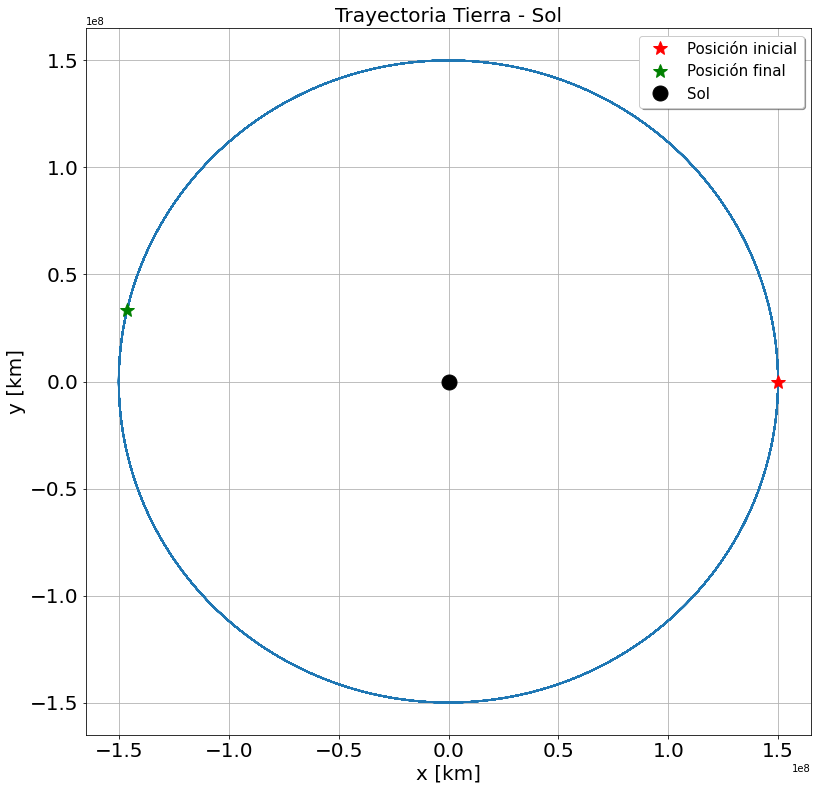

In [42]:
#Para ver no más, visualicemos la trayectoria que está recorriendo la Tierra:

P = LF_DKD(a,x,y,n,h)

plt.figure(figsize=(13,13))
plt.xlabel('x [km]',size=20)
plt.ylabel('y [km]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Trayectoria Tierra - Sol',size=20)
plt.plot(P[0],P[1])
plt.plot(x[0],y[0],'*r',markersize=15,label='Posición inicial')
plt.plot(P[0][-1],P[1][-1],'*g',markersize=15,label='Posición final')
plt.plot(0,0,'ok',markersize=15,label='Sol')
plt.legend(fontsize=15,shadow=True,loc='upper right')
plt.grid(True)

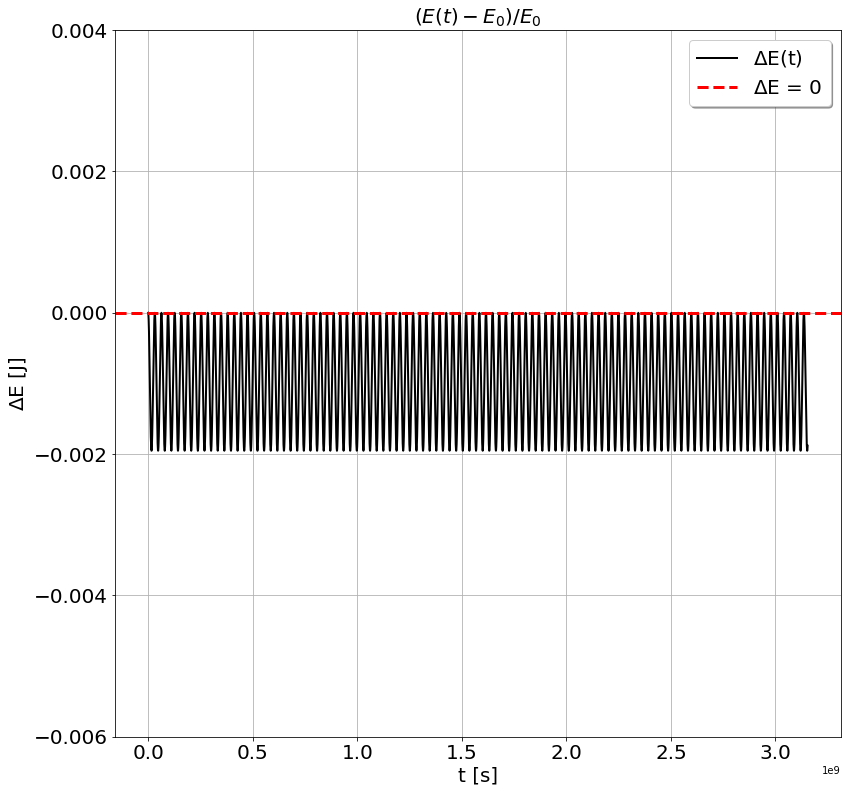

In [30]:
#Veamos el error porcentual:
DeltaE[0] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [s]',size=20)
plt.ylabel('$\Delta$E [J]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

In [31]:
n = int(1e+5)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_DKD(a,x,y,n,h)

DeltaE[1] = max(abs(dE))

In [32]:
n = int(1e+6)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_DKD(a,x,y,n,h)

DeltaE[2] = max(abs(dE))

In [35]:
n = int(1e+7)
h = t/n
n = int(1e+6) #Para reducir el tiempo de cómputo. Acá estaría dando ~ 10 vtas en vez de 100...

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_DKD(a,x,y,n,h)

DeltaE[3] = max(abs(dE))

In [34]:
n = int(1e+8)
h = t/n
n = int(1e+7)

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = LF_DKD(a,x,y,n,h)

DeltaE[4] = max(abs(dE))

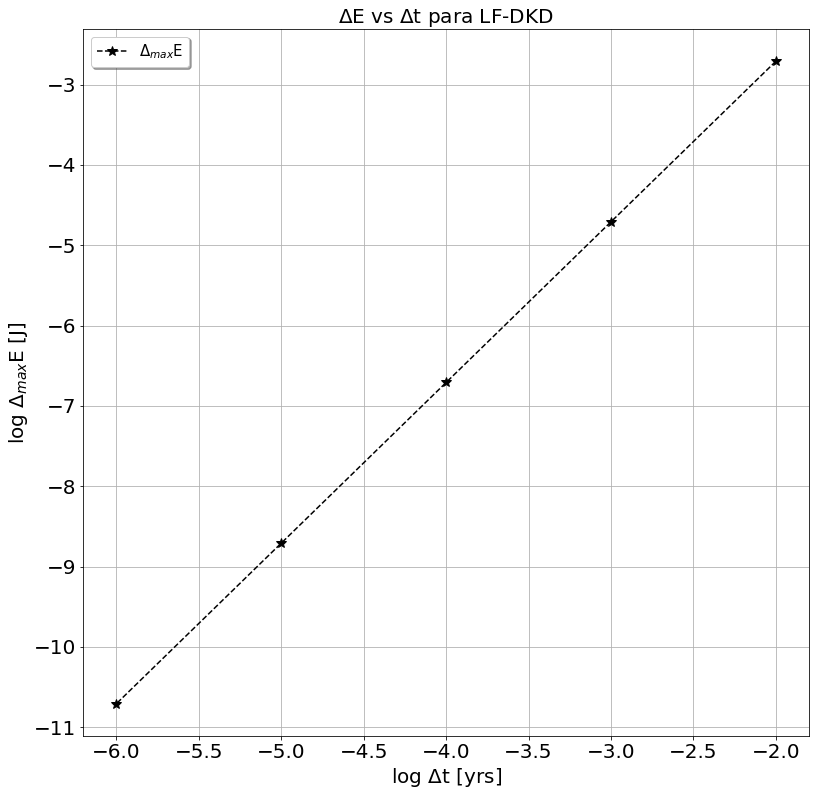

In [36]:
logE = np.log10(DeltaE) #Para poner el error en escala logarítmica

plt.figure(figsize=(13,13))
plt.xlabel('log $\Delta$t [yrs]',size=20)
plt.ylabel('log $\Delta_{max}$E [J]',size=20)
plt.title('$\Delta$E vs $\Delta$t para LF-DKD',size=20)
plt.plot([-i for i in range(2,7)],logE,'--*k',label='$\Delta_{max}$E',markersize=10)
plt.legend(loc='upper left',fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

**Euler explícito:**

In [85]:
v0 = np.sqrt(G*M/r0) #km/s
E0 = M_t*(v0**2)/2 - G*M/r0 #Valor de la Energía en t = 0

DeltaE = np.empty(5) #Para medir los errores máximos en las 5 integraciones para h distinto que realizaremos con LF

#step y n (lo podríamos poner dentro de una func...):

n = int(1e+4)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

def a(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r**(-3)),y*(r**(-3))])
    return a

def Euler(a,x,y,n,h,vx=0.0,vy=v0): #"Vectorialmente" Y' = F, con Y' = (x',v') = (v,a(x)) = F. Luego, apliquemos Euler Explíc
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        
        x[i+1] = x[i] + vx*h
        y[i+1] = y[i] + vy*h
        
        vx = vx + a(x[i],y[i])[0]*h
        vy = vy + a(x[i],y[i])[1]*h
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

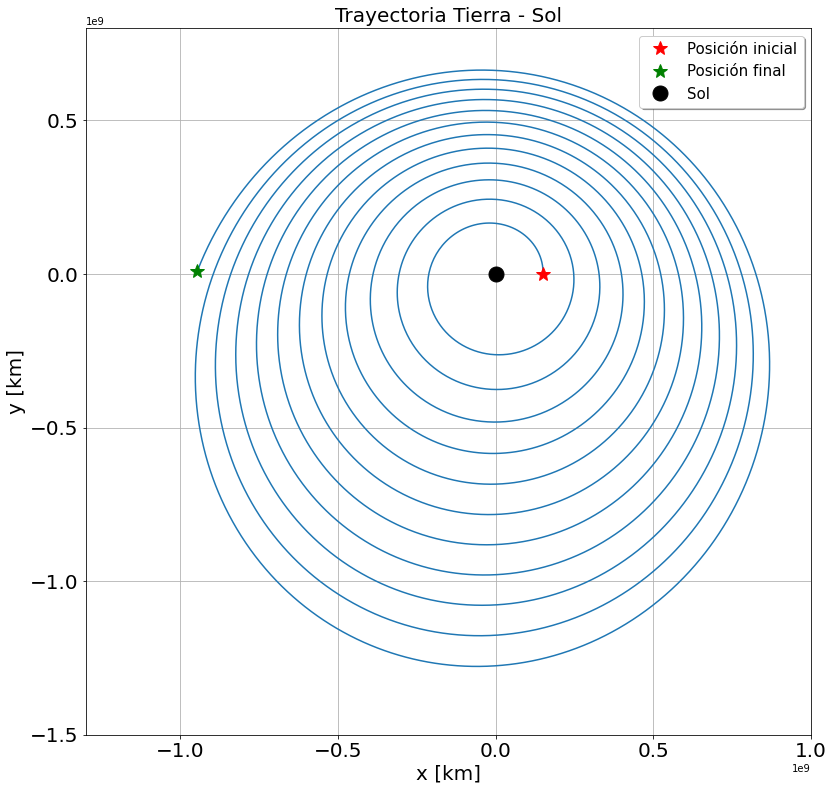

In [86]:
#Para ver no más, visualicemos la trayectoria que está recorriendo la Tierra:

P = Euler(a,x,y,n,h)

plt.figure(figsize=(13,13))
plt.xlabel('x [km]',size=20)
plt.ylabel('y [km]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(-1.3e+9,1e+9)
plt.ylim(-1.5e+9,0.8e+9)
plt.title('Trayectoria Tierra - Sol',size=20)
plt.plot(P[0],P[1])
plt.plot(x[0],y[0],'*r',markersize=15,label='Posición inicial')
plt.plot(P[0][-1],P[1][-1],'*g',markersize=15,label='Posición final')
plt.plot(0,0,'ok',markersize=15,label='Sol')
plt.legend(fontsize=15,shadow=True,loc='upper right')
plt.grid(True)

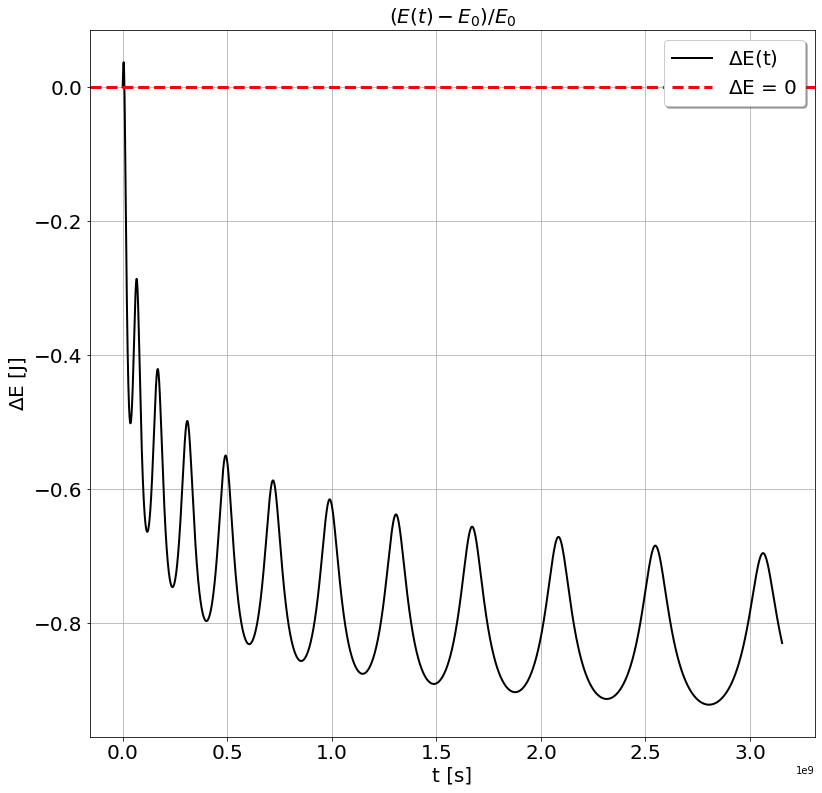

In [87]:
#Veamos el error porcentual:
DeltaE[0] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [s]',size=20)
plt.ylabel('$\Delta$E [J]',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

In [88]:
n = int(1e+5)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = Euler(a,x,y,n,h)

DeltaE[1] = max(abs(dE))

In [89]:
n = int(1e+6)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = Euler(a,x,y,n,h)

DeltaE[2] = max(abs(dE))

In [90]:
n = int(1e+7)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = Euler(a,x,y,n,h)

DeltaE[3] = max(abs(dE))

In [91]:
n = int(1e+8)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

P = Euler(a,x,y,n,h)

DeltaE[4] = max(abs(dE))

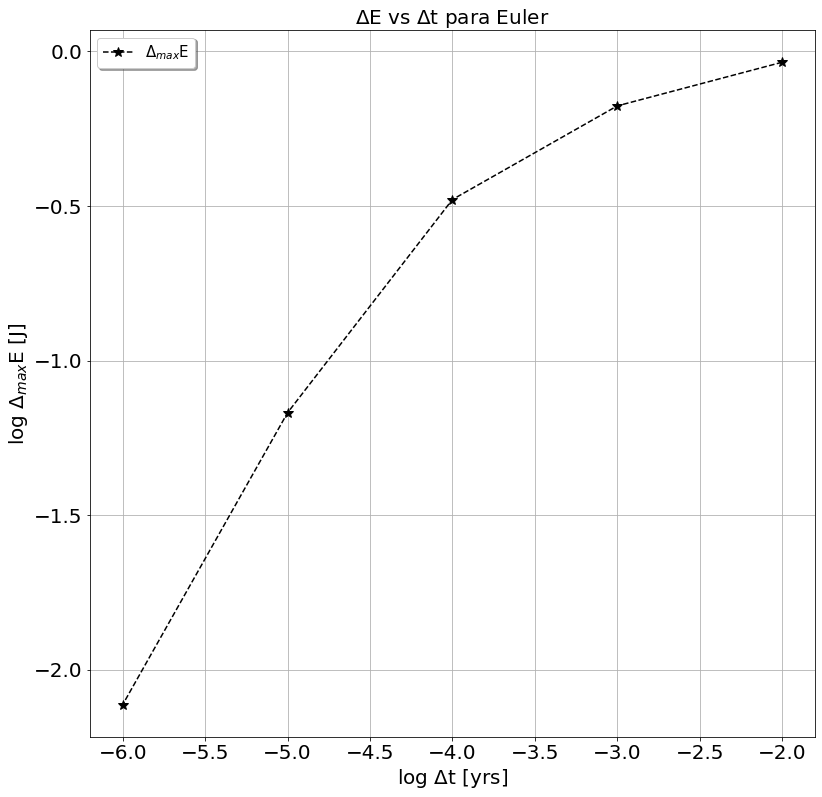

In [92]:
logE = np.log10(DeltaE) #Para poner el error en escala logarítmica

plt.figure(figsize=(13,13))
plt.xlabel('log $\Delta$t [yrs]',size=20)
plt.ylabel('log $\Delta_{max}$E [J]',size=20)
plt.title('$\Delta$E vs $\Delta$t para Euler',size=20)
plt.plot([-i for i in range(2,7)],logE,'--*k',label='$\Delta_{max}$E',markersize=10)
plt.legend(loc='upper left',fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

## 38)
Integraremos **Con el método LeapFrog KDK** la órbita del Sol alrededor del centro de la *Milky Way* asumiendo distintos tipos de potenciales. <br>
Pedimos un *softening* $\epsilon = 0.2 kpc$ , un tiempo de integración de 10 períodos, con 10000 pasos. <br>
### $a)$ Potencial Esférico
### <center> $\phi (r) = \frac{GM \cdot r}{r_0^3}$ </center> <br>

In [95]:
#ctes:

G = 43.03e+3 #kpc * (km/s)^2 * 1/1e+10 M_s
M = 9 #1e+10 M_s
r0 = 8 #kpc
n = 10_000 #steps
e = 0.2 #kpc (softening)

#Qué necesito: acc = -grad pot ; posc inic = (r0,0) kpc (Mov 2D por F central) ; vel inic = (0,v0) km/s ; Tiempo de integ = 10 * Período Gyrs
#step = tiempo de integ / n

#Calculemos v0, E0, Período (T), tiempo de integ (t) y el step:

v0 = np.sqrt(G*M/r0) #km/s
E0 = M_t*(v0**2)/2 - G*M/r0 #Valor de la Energía en t = 0
DeltaE = np.empty(4) #Para medir los errores máximos en las 4 integraciones para distinto pot que realizaremos con LF

T = np.pi*2*r0/v0 #kpc * s/km


#Lo tengo que pasar a una unidad como la gente: Gyrs
T = T*0.98 #Gyrs

#Ahora si, el tiempo de integ =
t = 10*T

#y los steps resultan

h = t/n #Gyrs/paso

#Luego, no quiero guardar las velocidades (no me interesa qué pasa con la energía), pero si las posiciones en cada step. Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = r0 #kpc
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

#Caso a) (Pot esférico):

#a = -G*M/r0^3 (x/r,y/r)

def a_esf(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M/(r0**3) * np.array([x/r,y/r])
    return a

#Y escribamos el integrador, que va a ser el LF KDK porque sabemos que es re bien comportado para el caso P2C:

def LF(a=a_esf,x=x,y=y,vx=0,vy=v0): #(x,y) listas vacías excepto por las pos inic, (vx,vy) variables, pero comenzamos con las v inic.
                                            # a = (ax,ay) func para obtener la aceleración.
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        kx = vx + a(x[i],y[i])[0]*h/2
        ky = vy + a(x[i],y[i])[1]*h/2
        
        x[i+1] = x[i] + kx*h
        y[i+1] = y[i] + ky*h
        
        vx = kx + a(x[i+1],y[i+1])[0]*h/2
        vy = ky + a(x[i+1],y[i+1])[1]*h/2
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

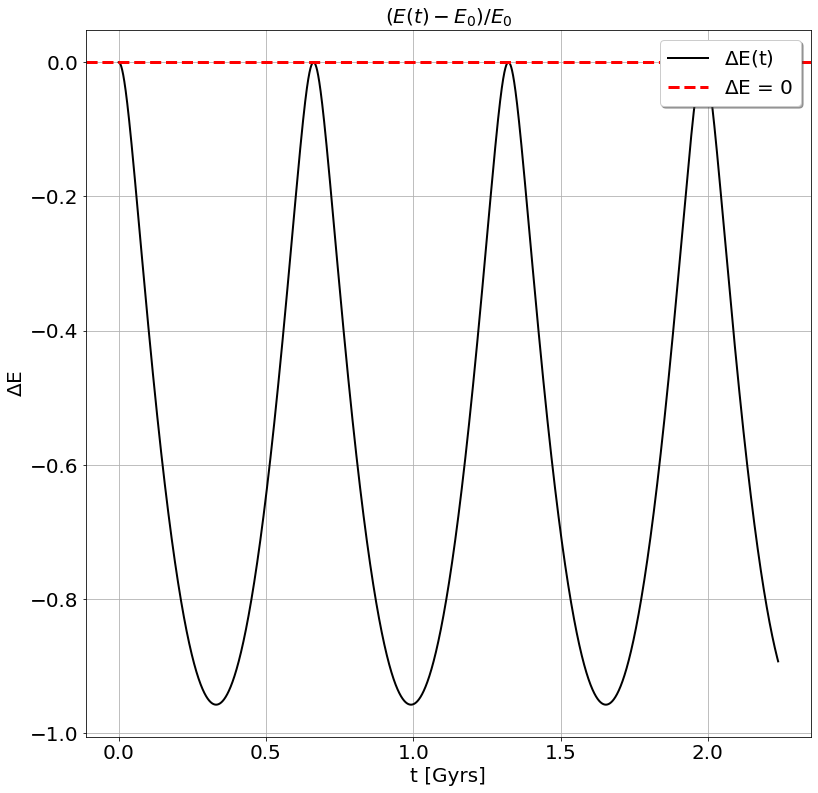

In [112]:
#Veamos el error porcentual:
P = LF()
DeltaE[0] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [Gyrs]',size=20)
plt.ylabel('$\Delta$E',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

### $b)$ Potencial Kepleriano
### <center> $\phi (r) = \frac{-GM}{r}$ </center> <br>

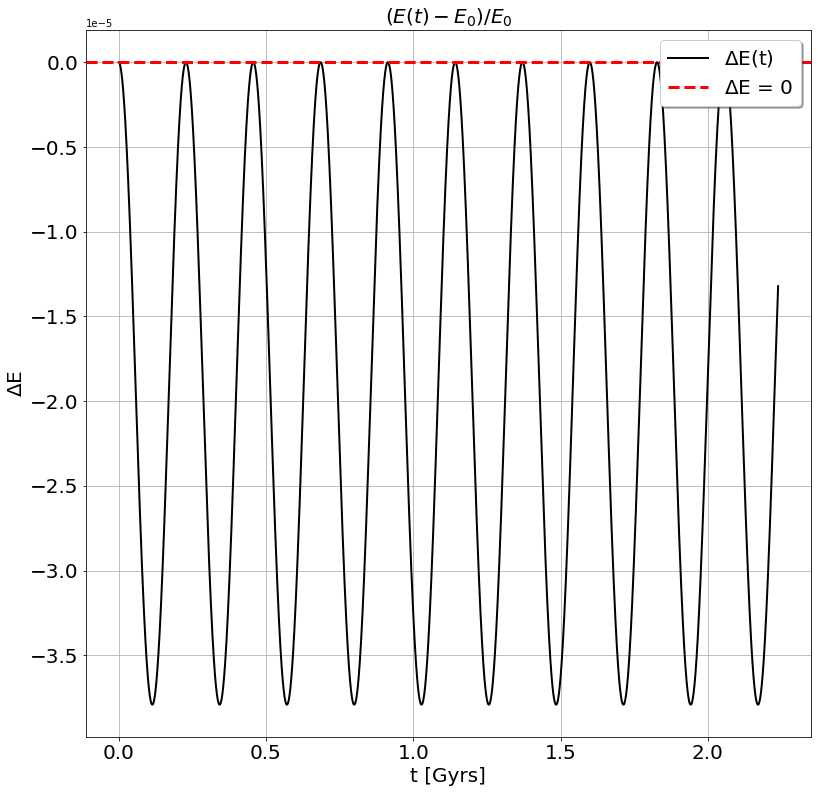

In [111]:
def a_Kep(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r)**(-3),y*(r)**(-3)])
    return a

#Veamos el error porcentual:
P = LF(a=a_Kep)
DeltaE[1] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [Gyrs]',size=20)
plt.ylabel('$\Delta$E',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

### $c)$ Potencial de Plummer
### <center> $\phi (r) = \frac{-GM}{\sqrt{r^2 + \epsilon ^2}}$ </center> <br>

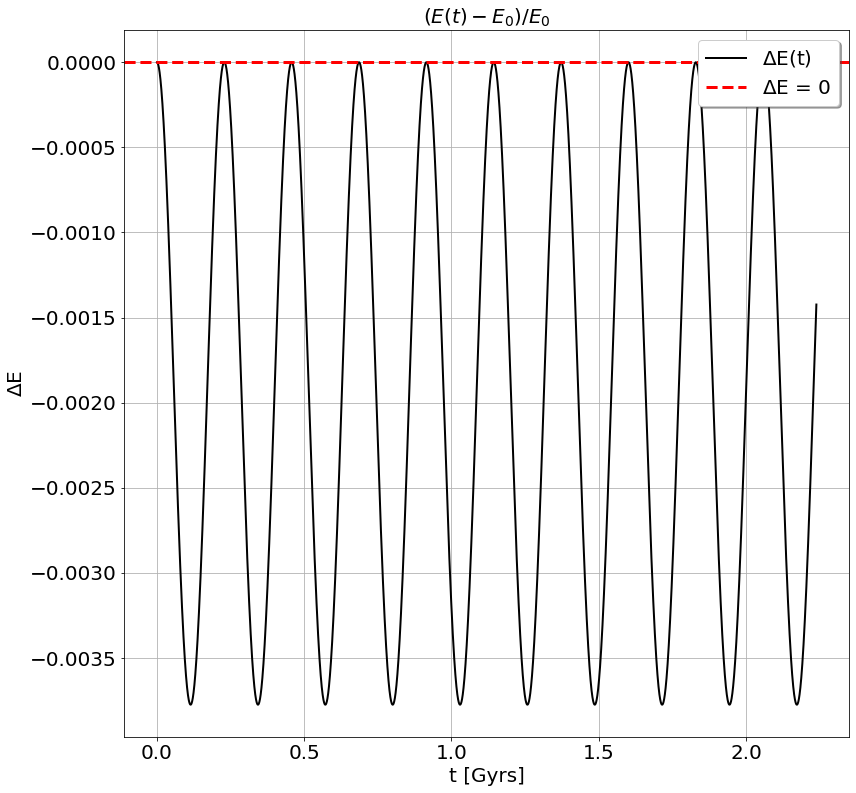

In [110]:
def a_Plum(x,y):
    r = np.sqrt(x**2 + y**2) #distancia
    R = np.sqrt(r**2 + e**2) #el término que contiene al softening
    a = -G*M* np.array([x*(R)**(-3),y*(R)**(-3)])
    return a

#Veamos el error porcentual:
P = LF(a=a_Plum)
DeltaE[2] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [Gyrs]',size=20)
plt.ylabel('$\Delta$E',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

### $d)$ Potencial Isócrono
### <center> $\phi (r) = \frac{-GM}{\epsilon + \sqrt{r^2 + \epsilon ^2}}$ </center> <br>

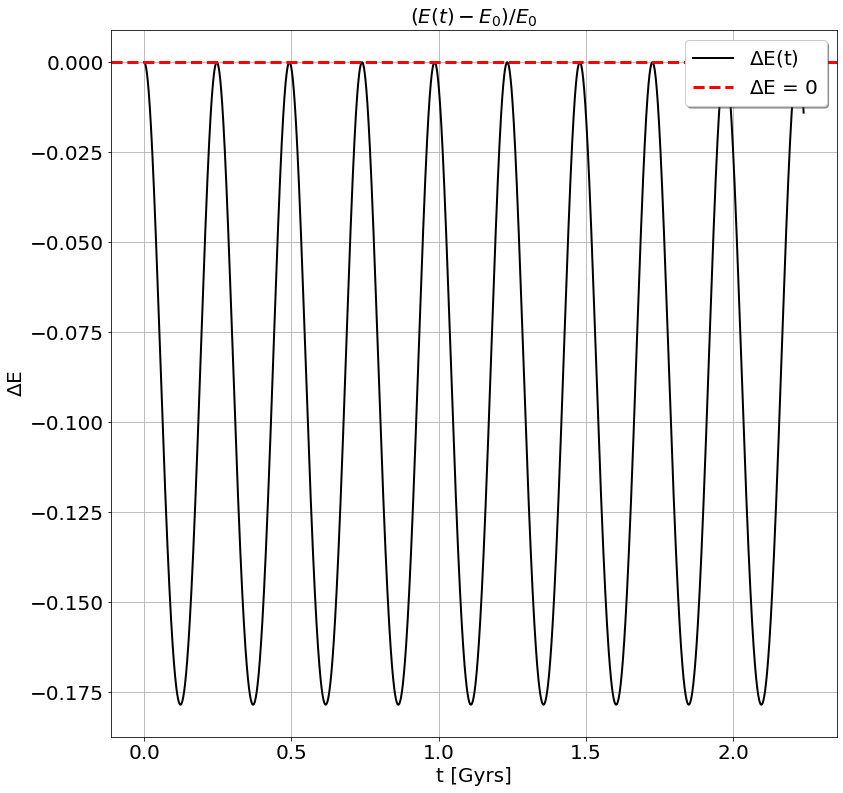

In [109]:
def a_iso(x,y):
    r = np.sqrt(x**2 + y**2) #distancia
    R = np.sqrt(r**2 + e**2) #el término que contiene al softening
    a = -G*M* np.array([x/(R*(R+e)**2),y/(R*(R+e)**2)])
    return a

#Veamos el error porcentual:
P = LF(a=a_iso)
DeltaE[3] = max(abs(dE))

plt.figure(figsize=(13,13))
plt.xlabel('t [Gyrs]',size=20)
plt.ylabel('$\Delta$E',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-0.006,0.004)
plt.title('$(E(t)-E_0)/E_0$',size=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E(t)',lw=2,color='k')
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.legend(fontsize=20,shadow=True,loc='upper right')
plt.grid(True)

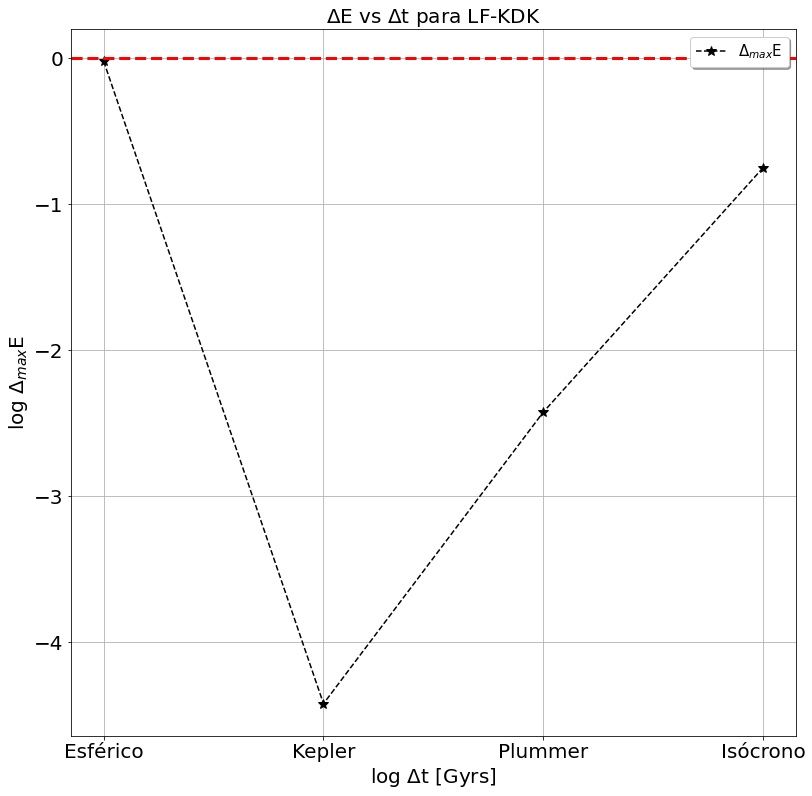

In [108]:
logE = np.log10(DeltaE) #Para poner el error en escala logarítmica

plt.figure(figsize=(13,13))
plt.xlabel('log $\Delta$t [Gyrs]',size=20)
plt.ylabel('log $\Delta_{max}$E',size=20)
plt.title('$\Delta$E vs $\Delta$t para LF-KDK',size=20)
plt.plot([i for i in range(len(DeltaE))],logE,'--*k',label='$\Delta_{max}$E',markersize=10)
plt.legend(loc='upper right',fontsize=15,shadow=True)
plt.axhline(0,lw=3,ls='--',label='$\Delta$E = 0',color='r')
plt.xticks(ticks=[i for i in range((len(DeltaE)))],labels=['Esférico','Kepler','Plummer','Isócrono'],size=20)
plt.yticks(fontsize=20)
plt.grid(True);